In [1]:
from sage.combinat.cartesian_product import CartesianProduct_iters
from matplotlib import pyplot as plt, patches, collections
from ipywidgets import interact, interact_manual
from datetime import datetime
import ipywidgets as widgets
from matplotlib import path
import sympy as spy
import numpy as np

In [2]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#485665','#D972FF','#DEFFFC','#89023E','#F1ECCE','#474B24','#5FBB97','#B2ABBF','#FCF0CC']

In [596]:


class Plano:
    
    def __init__(self, order):
        self.order = order
        self.field = GF(order)
        self.eField = self.getSortField()
        self.points = np.array(CartesianProduct_iters(self.eField,self.eField))
        self.mainLines = list()
        self.mainLinesList = list()
        self.lines = list()
    
    def getMainLines(self):
        if(not self.mainLinesList):
            self.__mainLines()
        
        return self.mainLines
    
    def getMainLinesList(self):
        if(not self.mainLinesList):
            self.__mainLines()
            
        return self.mainLinesList
    
    def getLines(self):
        if(not self.lines):
            self.__allLines()
        return self.lines
    
    def getCartesianMainLinesList(self):
        if(not self.mainLines):
            self.__mainLines()
            
        return Point.vCartesian(Point, self.mainLinesList, self.eField)
    
    def getCartesianLines(self):
        if(not self.lines):
            self.__allLines()
            
        return Point.vCartesian(Point, self.lines, self.eField)
    
    def __allLines(self):
        all_lines = []
        if(not self.mainLines):
            self.__mainLines()
        for mainLine in self.mainLines:
            all_lines.append(np.array(mainLine.getParallelLines()))
        self.lines =  all_lines
    
    def __mainLines(self):
        mainLines = list()
        mainLinesList = list()
        aPoints = np.reshape(np.array(self.points),[self.order,self.order,2])
        
        for dirP in aPoints[1,:]: 
            line =Line(dirP, self.eField)
            mainLines.append(line)
            mainLinesList.append(line.toList())
        
        line = Line(aPoints[0,:][1], self.eField)
        mainLines.append(line)
        mainLinesList.append(line.toList())
        self.mainLines = mainLines
        self.mainLinesList = mainLinesList
        
    def getOrder(self):
        return self.order
    
    def getField(self):   
        return self.field
    
    def getSortField(self):
        return Point.merge_sort(Point,(list(self.field)))
    
    def getPoints(self):
        return self.points
    
    def getNumbersValuesField(self,field):

        return Point.vCartesian(Point,field, field), field
    
    


In [597]:

class Line:
    
    def __init__(self, dirP, field, b=np.array([0,0])):
        self.dirP= dirP
        self.field = field
        self.intercep = b
        self.line = self.__generetaLine()
        self.__parallelLines()
        self.cartesianLine = Point.vCartesian(Point,self.line, self.field)
        self.pathLine = path.Path(Point.vCartesian(Point,self.line,field)[::-1], closed =True)
        self.parallelLines = list()
        self.cartesianParallelLines = list()
        
    
    def __generetaLine(self):
        product = lambda a,b,t: t*a + b;
        vproduct = np.vectorize(product,  excluded=['a', 'b'])
        vproduct.excluded.add(0)
        vproduct.excluded.add(1)

        
        return Point.merge_sort(Point,vproduct(self.dirP,self.intercep,self.field))

    
    def __parallelLines(self):
        lines = []
        for i in self.field:
            if len(self.line)>2:
                condition1 = self.line[1][0] == self.line[2][0]
                condition2 = self.line[1][1] == self.line[2][1]
            else:
                condition1 = self.line[1][0] == 0
                condition2 = self.line[1][1] == 0
                
            if condition1: 
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
            elif condition2:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,0,i,1)))
            else:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
            
            
            self.parallelLines = lines
            self.cartesianParallelLines = Point.vCartesian(Point, lines, self.field)            
            

            
            
    def getField(self):
        return self.field
    
    def getPathLine(self):
        return self.pathLine
        
        
    def dilatation(self, l,a,b,y): #define una dilatacion como se especifica arriba
        return y*l + np.array([a,b])
    
    def getDirP(self):
        return self.dirP
    
    def toList(self):
        return self.line
    def getCartesianLine(self):
        return self.cartesianLine
    
    def containPoint(self, punto):
        for i in self.cartesianLine:
            if punto.getX()== i[0] and punto.getY() == i[1]:
                return True
        return False
    
    def getParallelLines(self):
        if(not self.parallelLines):
             self.__parallelLines()
        return self.parallelLines
    
    def getCartesianParallelLines(self):
        if(not self.parallelLines):
             self.__parallelLines()
        
        return self.cartesianParallelLines


In [598]:
class Point:
    
    def __init__(self,x,y, field):
        self.x = x
        self.y = y
        self.field = field
        
    @classmethod
    def initFromArray(self,xy, field):
        return Point(xy[0], xy[1], field)
        
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    
    def getXY(self):
        return np.array([self.x, self.y])
    
    def getField(self):
        return self.field

    @staticmethod
    def vCartesian(self,a,F):
        vcartesian = np.vectorize(self.getCartesian,excluded=['G']) 
        vcartesian.excluded.add(1)
        return vcartesian(a,F)
    
    @staticmethod
    def vValueField(self,a,F):
        vvalueField = np.vectorize(self.getValueField,excluded=['F']) 
        vvalueField.excluded.add(1)
        return vvalueField(a,F)
    
    
    @staticmethod
    def getCartesian(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == G[i]):
                valor = i
        return valor

    @staticmethod
    def getValueField(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == i):
                valor = G[i]
        return valor
    
    @staticmethod
    def merge_sort(self, array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
        if len(array) < 2:
            return array


        midpoint = len(array) // 2

        # Sort the array by recursively splitting the input
        # into two equal halves, sorting each half and merging them
        # together into the final result
        return self.__merge(
            left=Point.merge_sort(self,array[:midpoint]),
            right=Point.merge_sort(self,array[midpoint:]))

    def __merge(left, right):
        # If the first array is empty, then nothing needs
        # to be merged, and you can return the second array as the result
        #print('l',left,'r', right)
        if len(left) == 0:
            return right

        # If the second array is empty, then nothing needs
        # to be merged, and you can return the first array as the result
        if len(right) == 0:
            return left

        result = []
        index_left = index_right = 0


        # Now go through both arrays until all the elements
        # make it into the resultant array
        while len(result) < len(left) + len(right):
            # The elements need to be sorted to add them to the
            # resultant array, so you need to decide whether to get
            # the next element from the first or the second array
            try:
                if left[index_left][0] == right[index_right][0]:
                    condition = left[index_left][1] <= right[index_right][1]
                else:
                    condition = left[index_left][0] <= right[index_right][0]

                    
                
            except:
                condition = left[index_left] <= right[index_right]

            if condition:
                result.append(left[index_left])
                index_left += 1
            else:
                result.append(right[index_right])
                index_right += 1

            # If you reach the end of either array, then you can
            # add the remaining elements from the other array to
            # the result and break the loop
            if index_right == len(right):
                #print(result,left,right)
                for i in left[index_left:]:
                    result.append(i)
                break

            if index_left == len(left):
                #print(result,left,right)
                for i in right[index_right:]:
                    result.append(i)
                break

        #print(result)

        return result
        
    

In [636]:

class PlotPlanes:
    def __init__(self, ngrid,size,colors,folder):
        
        self.ngrid = ngrid
        self.size = size
        self.colors = colors
        self.folder = folder
        fig, ax = plt.subplots(figsize=(self.size, self.size))
        self.fig = fig
        self.ax = ax
        
    def plot_points(self):
        xpoint = np.matrix(np.arange(self.ngrid))
        ones = np.matrix(np.ones(self.ngrid))
            
        self.ax.set_facecolor("black")

        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))
        
        self.ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r', markersize='10')
        
        return self.fig, self.ax
                
    def plot_lines_set(self, lines):
        
        self.plot_points()
                
        for i in range(len(lines)):
            line = np.array((lines[i]))
            self.ax.plot(line[:,0],line[:,1], color = self.colors[i])

        self.fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{self.ngrid}.png')
        self.fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{self.ngrid}.svg')
        
    def plot_plano(self, alines):
                
        for i in range(len(alines)):
            self.plot_dir(alines[i],i)
            
        plt.show()
        self.fig.savefig(f'{self.folder}tpdoElPlano.png')
        self.fig.savefig(f'{self.folder}tpdoElPlano.svg')
    
        
    def plot_dir(self,dirP, color): 
        self.plot_points()  
        if(color == self.ngrid):
            self.ax.plot((dirP[:,:,1]),dirP[:,1,0], color = self.colors[color])        
        else:
            self.ax.plot(dirP[0,:,0],np.transpose(dirP[:,:,1]), color = self.colors[color])                
        self.fig.savefig(f'{self.folder}linasDireccion{i}.png')
        self.fig.savefig(f'{self.folder}linasDireccion{i}.svg')      
        
        

In [637]:


def determinate_parallel_simmetryLM(lineL, lineM):
    pathL = lineL.getPathLine()
    pathM = lineM.getPathLine()
    F = np.array(lineL.getField())
    cL = lineL.getCartesianLine()
    condition = False
    centers = list()
    points = list()
    if pathL.intersects_path(pathM):
        parallelsM = np.array(Point.vCartesian(Point, lineM.getCartesianParallelLines(),
                                               lineM.getField()), dtype = np.ndarray)
        for lm in parallelsM:
            mask=vContain(np.array(lm)[:,0],np.array(lm)[:,1],cL)
            centers.append( lm[mask][0])
            point =  Point.vValueField(Point,lm[mask][0],F) +Point.vValueField(Point, lm[-1],F)
            points.append(point)
                    
    vDeterminate_central_simmetry_c = np.vectorize(determinate_central_simmetry_c)
    vPoint = np.vectorize(Point,excluded=['field'])
    vPoint.excluded.add(2)
    
    
    #points = Point.vValueField(Point, np.array(parallelsM)[:,(Point.getCartesian(lineL.toList()[0][0],F)+3)%len(lineL.toList()[0]),:],F)
    centerPoints = vPoint(np.array(centers)[:,0],np.array(centers)[:,1], lineL.getField())
    pointsI = vPoint(np.array(points)[:,0],np.array(points)[:,1], lineL.getField())
    

    scs= vDeterminate_central_simmetry_c(np.array(centerPoints))   
    return scs,Point.vValueField(Point,parallelsM,F)


def contain(x,y, array):
    
    for i in array:
        if x== i[0] and y == i[1]:
            return True
    return False


In [638]:

#,3,4,5,7,8,9,11,13,16]
order=[2,3,4,5,7,8,9,11,13,16]
vPlane = np.vectorize(Plano)
planos = vPlane(order)
planosDict = dict(zip(order, planos))


wOption2 = widgets.Dropdown(options = ['one line dir', 'all dir', 'all lines dir'])
wOrder2 = widgets.Dropdown(options = order)
wSetLinesDir2 = widgets.Dropdown(options=[])

# Updates the image options based on directory value

def update_order(w):
    if wOption2.value == 'one line dir' or wOption2.value == 'all dir':
        wSetLinesDir2.options =[]
    else:  
        wSetLinesDir2.options =np.arange(wOrder2.value+1).tolist()
    
def update_option(*args):
    if wOption2.value == 'one line dir' or wOption2.value == 'all dir':
        wSetLinesDir2.options =[]
    else:  
        wSetLinesDir2.options =np.arange(wOrder2.value+1).tolist()


# Tie the image options to directory value
wOrder2.observe(update_order, 'value')
wOption2.observe(update_option, 'value')


def interactive_plot_plane(option, order,set_lines_dir): 
    myPlots = PlotPlanes(order, 15, colors, '')
    if  wOption2.value == 'one line dir':
        myPlots.plot_lines_set(planosDict[order].getCartesianMainLinesList())
    elif wOption2.value == 'all dir':
        myPlots.plot_plano(planosDict[order].getCartesianLines())
    else:
        myPlots.plot_dir(planosDict[order].getCartesianLines()[set_lines_dir],set_lines_dir)

        
    
_ = interact(interactive_plot_plane, order=wOrder2, set_lines_dir=wSetLinesDir2, option = wOption2)


interactive(children=(Dropdown(value='one line dir', options=('one line dir', 'all dir', 'all lines dir'), des…

In [602]:

def plotCentralSymmetryC(c,plano,size):
    npoints = plano.getOrder()
    F = plano.getSortField()
    F2 = plano.getPoints()
    fig, ax = plt.subplots(figsize=(size, size))
    plt.yticks(np.arange(0, npoints+1, 1.0))
    ax.set_facecolor("black")

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
    #ax.set_facecolor("black")
    
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")
    for p in F2:
        vp = Point.vCartesian(Point,p,F)
        if p[0] == c[0] and p[1] == c[1]:
            vc = Point.vCartesian(Point,c,F)
            make_loop(vc+0.17,0.25, ax, theta1=0, theta2=360)
        else:
            pp=Point(p[0],p[1],F)
            cp=Point(c[0],c[1],F)
            t,_ = determinate_translation(pp, cp)
            t2 = composition(t,t)
            ttp = t2(p)
            
            cp = vcartesian(p,F)
            cttp = vcartesian(ttp,F)
            a = patches.FancyArrowPatch(cp, cttp, connectionstyle="arc3,rad=0.2", **kw)
            
            ax.add_patch(a)


            
    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])

In [593]:
def get_arc(x1,y1,x2,y2, F):    
    midX = (Point.getCartesian(x1, F) - Point.getCartesian(x2,F))/2
    midY = (Point.getCartesian(y1, F) - Point.getCartesian(y2,F))/2
    
    
    width = np.sqrt((2*midX)**2 + (2*midY)**2)
    height = width*0.16
    
    xCenter = midX+Point.getCartesian(x2,F)
    yCenter =  midY + Point.getCartesian(y2,F)
    
    angle0 = 0
    anglef = 180
    
    if width == 0:
        
        width = 0.3
        height = 0.3
        
        xCenter += width*0.38
        yCenter += height*0.38
        
        anglef = 360
        
    try:
        angle = np.arctan(midY/midX)*180/np.pi
    except ZeroDivisionError:
        if(midY < 0):
            angle = -90
        elif midY>0:
            angle = 90
        else:
            angle =0
        
    return 1.0*xCenter, 1.0*yCenter, angle,width, height,angle0,anglef


vget_arc = np.vectorize(get_arc,excluded=['F']) 
vget_arc.excluded.add(4)

In [569]:
def make_loop(center, radius, ax, theta1=-30, theta2=180):
   rwidth = 0.005
   ring = patches.Wedge(center, radius, theta1, theta2, width=rwidth)
   offset = 0.02
   xcent = center[0] - radius + (rwidth / 2)
   left = [xcent - offset, center[1]]
   right = [xcent + offset, center[1]]
   bottom = [(left[0] + right[0]) / 2., center[1] - 0.05]
   arrow = plt.Polygon([left, right, bottom, left])
   p = collections.PatchCollection(
      [ring, arrow],
      edgecolor='white',
      facecolor='white'
   )
   ax.add_collection(p)    
    

In [452]:
def plot_parallel_simetryLM(plano, scs, parallels, size,folder):
    npoints = plano.getOrder()
    F = plano.getSortField()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_facecolor("black")
    
    plt.xticks(np.arange(0, npoints+1, 1.0))
    plt.yticks(np.arange(0, npoints+1, 1.0))

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
        
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")

    
    for l in range(len(parallels)):
        lp =  scs[0][l](parallels[l]) 
        
        cl = Point.vCartesian(Point, parallels[l],F)
        clp = Point.vCartesian(Point, lp,F)
        for pos in range(len(cl)):
            if(cl[pos][0] == clp[pos][0] and cl[pos][1] == clp[pos][1]):
                make_loop(cl[pos]+0.17,0.25, ax, theta1=0, theta2=360)
            else:
                a = patches.FancyArrowPatch(cl[pos], clp[pos], connectionstyle="arc3,rad=0.2", **kw)
                ax.add_patch(a)
        
    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])
    
    fig.savefig(f'{folder}dilatacion{Date}.png')
    fig.savefig(f'{folder}dilatacion{i}.svg') 

    plt.show()

In [453]:
class Translation:
    
    def __init__(self, punto, puntoImagen, plano):
        self.punto = punto
        self.puntoImagen = puntoImagen
        self.plano = plano
        self.__calculateParams()
    
    @classmethod
    def initFromParams(alpha,beta, plano):
        self.alpha = alpha
        self.beta = beta
        self.field = plano
        self.__calculateParams()

        
    def __calculateParams(self):
        self.alpha = self.puntoImagen.getX() - self.punto.getX()
        self.beta = self.puntoImagen.getY() - self.punto.getY()
        self.parameters = np.array([self.alpha, self.beta, 1])
    
    
    def transformCoordinates(self, setCoordinates):
        return setCoordinates + self.parameters[:2]
    
    def transformPoint(self, point):
        xy = point.getXY()
        imageXY = self.transformCoordinates(xy)
        return Point.initFromArray(imageXY, plano.getSortField())
        
    def getPoint(self):
        return self.punto
    
    def getImagePoint(self):
        return self.puntoImagen
    
    def getAlpha(self):
        return self.params
    
    def getBeta(self):
        return self.beta
    
    def getPlano(self):
        return self.plano

    def getParams(self):
        return self.parameters
    
    def getTransfomrCoordinates(self):
        return lambda xy: xy + self.parameters[:2]
    
    

In [454]:
class Homothety:
    
    def __init__(self, punto, puntoImagen, centro, plano):
        self.punto = punto
        self.puntoImagen = puntoImagen
        self.centro = centro
        self.plano = plano
        self.__calculateParams()
    
    @classmethod
    def initFromParams(alpha,beta, gamma, plano):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.field = plano
        self.__calculateParams()

        
    def __calculateParams(self):
        b = vector( [self.puntoImagen.getX(), self.puntoImagen.getY(), self.centro.getX()])
        if self.punto.getX() != 0 or self.punto.getY()!=0:
            if self.centro.getX() == self.punto.getX():
                b = vector( [self.puntoImagen.getX(), self.puntoImagen.getY(), self.centro.getY()])
                a = Matrix( [[1, 0, self.punto.getX()],[0,1,self.punto.getY()],[0,1,self.centro.getY()]])
            else:
                a = Matrix( [[1, 0, self.punto.getX()],[0,1,self.punto.getY()],[1,0,self.centro.getX()]])
        else:
            if self.centro.getX() == self.punto.getX():
                b = vector( [self.centro.getX(), self.centro.getY(), self.puntoImagen.getY()])
                a = Matrix( [[1, 0, self.centro.getX()],[0,1,self.centro.getY()],[0,1,self.punto.getY()]])
            else:
                b = vector( [self.centro.getX(),self.centro.getY(), self.puntoImagen.getX()])
                a = Matrix( [[1, 0, self.centro.getX()],[0,1,self.centro.getY()],[1,0,self.punto.getX()]])


        if self.centro.getX() == 0 and self.centro.getY() == 0 and (self.puntoImagen.getX()==0 or self.puntoImagen.getY()==0):
            if self.puntoImagen.getX()==0 and self.puntoImagen.getY()==0:
                self.params = np.array(a.solve_right(b))
            elif self.puntoImagen.getY()==0:
                self.params = [0,0, self.puntoImagen.getX()/self.punto.getX()]
            elif self.puntoImagen.getX()==0:
                self.params = [0,0, self.puntoImagen.getY()/self.punto.getY()]        
        else :
            self.params = np.array(a.solve_right(b))

    
    
    def transformCoordinates(self, setCoordinates):
        return setCoordinates*self.getGamma() + self.params[:2]
    
    def transformPoint(self, point):
        xy = point.getXY()
        imageXY = self.transformCoordinates(xy)
        return Point.initFromArray(imageXY, self.field)
        
    def getPoint(self):
        return self.punto
    
    def getImagePoint(self):
        return self.puntoImagen
    
    def getCenter(self):
        return self.center
    
    def getAlpha(self):
        return self.params[0]
    
    def getBeta(self):
        return self.params[1]
    
    def getGamma(self):
        return self.params[2]
    
    def getPlano(self):
        return self.plano

    def getParams(self):
        return self.parameters
    
    def getTransformCoordinates(self):
        return lambda xy: xy*self.getGamma() + self.params[:2]
    


In [455]:
class CentralSymmetry():
    
    def __init__(self, centro, plano):
        self.centro = centro
        self.plano = plano
        self.__determinateSymmetry()
    
    @classmethod
    def initFromParams(alpha,beta, gamma, plano):
        self.alpha = alpha
        self.beta = betaz
        self.gamma = gamma
        self.plano = plano
        self.__determinateSymmetry()
        
        
    def __determinateSymmetry(self):
        i= 0
        F = self.plano.getSortField()
        P = Point(F[i],F[i],F)
        while P.getX() == self.centro.getX() and P.getY()==self.centro.getY():
            i+=1
            P = Point(F[i],F[i],F)
        
        t = Translation(P, self.centro, self.plano)
        PI = t.transformPoint(t.transformPoint(P))
        H = Homothety(P, PI, self.centro, self.plano)
        
        self.alpha = H.getAlpha()
        self.beta = H.getBeta()
        self.gamma = H.getGamma()
        
        self.params = np.array([self.alpha, self.beta, self.gamma])

    def transformCoordinates(self, setCoordinates):
   
        return setCoordinates*self.getGamma() + self.params[:2]
    
    def transformPoint(self, point):
        xy = point.getXY()
        imageXY = self.transformCoordinates(xy)
        return Point.initFromArray(imageXY, self.field)
        
    def getCenter(self):
        return self.center
    
    def getAlpha(self):
        return self.params[0]
    
    def getBeta(self):
        return self.params[1]
    
    def getGamma(self):
        return self.params[2]
    
    def getPlano(self):
        return self.plano

    def getParams(self):
        return self.parameters
    
    def getTransformCoordinates(self):
        return lambda xy: xy*self.getGamma() + self.params[:2]
    


In [457]:
def plot_parallel_simetryLM(plano, tparallels, parallels, size,folder):
    npoints = plano.getOrder()
    F = plano.getSortField()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_facecolor("black")
    
    plt.xticks(np.arange(0, npoints+1, 1.0))
    plt.yticks(np.arange(0, npoints+1, 1.0))

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
        
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")

    
    for l in range(len(parallels)):
        
        cl = Point.vCartesian(Point, parallels[l],F)
        clp = Point.vCartesian(Point,  tparallels[l],F)
        for pos in range(len(cl)):
            if(cl[pos][0] == clp[pos][0] and cl[pos][1] == clp[pos][1]):
                make_loop(cl[pos]+0.17,0.25, ax, theta1=0, theta2=360)
            else:
                a = patches.FancyArrowPatch(cl[pos], clp[pos], connectionstyle="arc3,rad=0.2", **kw)
                ax.add_patch(a)
        
    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])
    
    fig.savefig(f'{folder}simetriaLM{datetime.now()}.png')
    fig.savefig(f'{folder}simetriaLM{datetime.now()}.svg') 

    plt.show()
    
    


In [451]:
def plot_dilatation(D,size,folder):
    
    npoints = D.getPlano().getOrder()
    
    
    F = D.getPlano().getSortField()
    F2 = D.getPlano().getPoints()
    

    dF2 = D.transformCoordinates(F2)
    
    cF2 = Point.vCartesian(Point, F2, F)
    ctF2 = Point.vCartesian(Point, dF2, F)
    
    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_facecolor("black")
    
    plt.xticks(np.arange(0, npoints+1, 1.0))
    plt.yticks(np.arange(0, npoints+1, 1.0))
    
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")
    
    for pos in range(len(cF2)):
        if(cF2[pos][0] == ctF2[pos][0] and cF2[pos][1] == ctF2[pos][1]):
            make_loop(cF2[pos]+0.17,0.25, ax, theta1=0, theta2=360)
        else:
            a = patches.FancyArrowPatch(cF2[pos], ctF2[pos], connectionstyle="arc3,rad=0.2", **kw)
            ax.add_patch(a)
       

    ax.set_xlim([-2,npoints+1])
    ax.set_ylim([-2,npoints+1])
    
    fig.savefig(f'{folder}dilatacion{datetime.now()}.png')
    fig.savefig(f'{folder}dilatacion{datetime.now()}.svg') 

    plt.show()

In [542]:
class PlotTransformation(PlotPlanes):
    def __init__(self, Transformation, size, colors, folder):
        self.T = Transformation
        super().__init__(self.T.getPlano().getOrder(),size, colors, folder)
    
    
    def plot_dilatation(self):
    
        npoints = self.T.getPlano().getOrder()

        F = self.T.getPlano().getSortField()
        F2 = self.T.getPlano().getPoints()

        dF2 = self.T.transformCoordinates(F2)

        cF2 = Point.vCartesian(Point, F2, F)
        ctF2 = Point.vCartesian(Point, dF2, F)
                
        self.plot_points()        
        
        style = "Simple, tail_width=0.5, head_width=6, head_length=8"

        kw = dict(arrowstyle=style, color="white")

        for pos in range(len(cF2)):
            if(cF2[pos][0] == ctF2[pos][0] and cF2[pos][1] == ctF2[pos][1]):
                self.make_loop(cF2[pos]+0.17,0.25, self.ax, 0, 360)
            else:
                a = patches.FancyArrowPatch(cF2[pos], ctF2[pos], connectionstyle="arc3,rad=0.2", **kw)
                self.ax.add_patch(a)


        self.ax.set_xlim([-2,npoints+1])
        self.ax.set_ylim([-2,npoints+1])

        self.fig.savefig(f'{self.folder}dilatacion{datetime.now()}.png')
        self.fig.savefig(f'{self.folder}dilatacion{datetime.now()}.svg') 

        #plt.show()

    def make_loop(self,center, radius, ax, theta1, theta2):
        rwidth = 0.005
        ring = patches.Wedge(center, radius, theta1, theta2, width=rwidth)
        offset = 0.02
        xcent = center[0] - radius + (rwidth / 2)
        left = [xcent - offset, center[1]]
        right = [xcent + offset, center[1]]
        bottom = [(left[0] + right[0]) / 2., center[1] - 0.05]
        arrow = plt.Polygon([left, right, bottom, left])
        p = collections.PatchCollection(
            [ring, arrow],
            edgecolor='white',
            facecolor='white'
        )
        ax.add_collection(p)    
        
    def plot_parallel_simetryLM(self):
        npoints = self.T.getPlano().getOrder()
        F = self.T.getPlano().getSortField()

        self.plot_points()        
        
        style = "Simple, tail_width=0.5, head_width=6, head_length=8"

        kw = dict(arrowstyle=style, color="white")

        parallels = self.T.getLineM().getParallelLines()
        tparallels = self.T.transformLines()
        
        for l in range(len(parallels)):

            cl = Point.vCartesian(Point, parallels[l],F)
            clp = Point.vCartesian(Point,  tparallels[l],F)
            for pos in range(len(cl)):
                if(cl[pos][0] == clp[pos][0] and cl[pos][1] == clp[pos][1]):
                    self.make_loop(cl[pos]+0.17,0.25, self.ax, theta1=0, theta2=360)
                else:
                    a = patches.FancyArrowPatch(cl[pos], clp[pos], connectionstyle="arc3,rad=0.2", **kw)
                    self.ax.add_patch(a)

        self.ax.set_xlim([-1,npoints])
        self.ax.set_ylim([-1,npoints])

        self.fig.savefig(f'{self.folder}simetriaLM{datetime.now()}.png')
        self.fig.savefig(f'{self.folder}simetriaLM{datetime.now()}.svg') 

        plt.show()
    
    
    

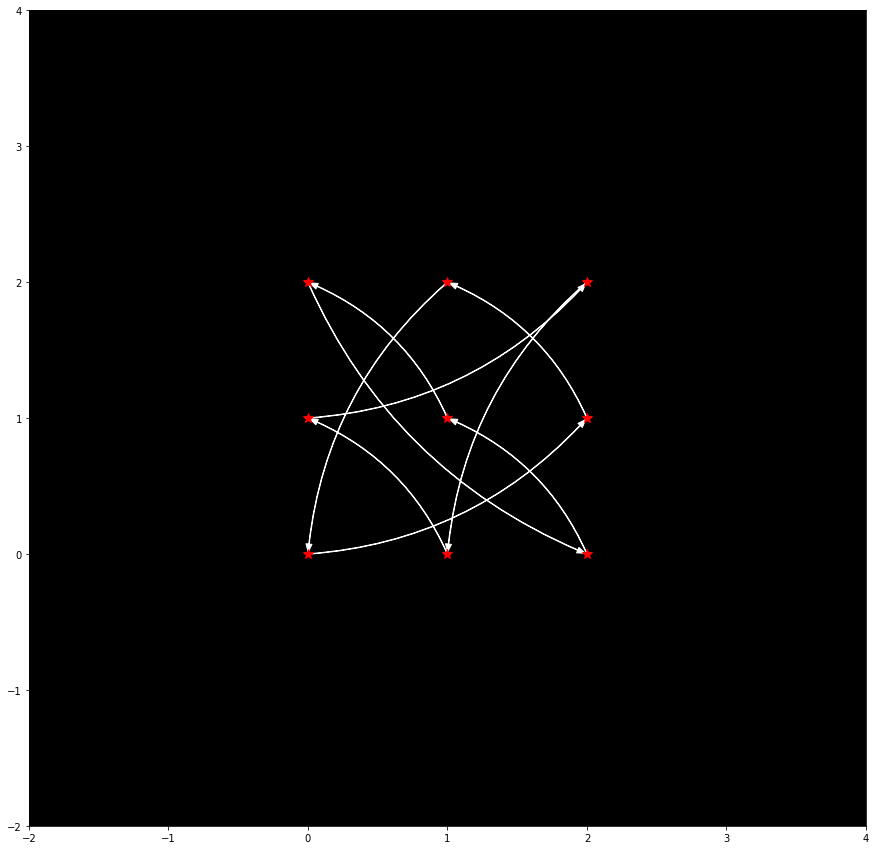

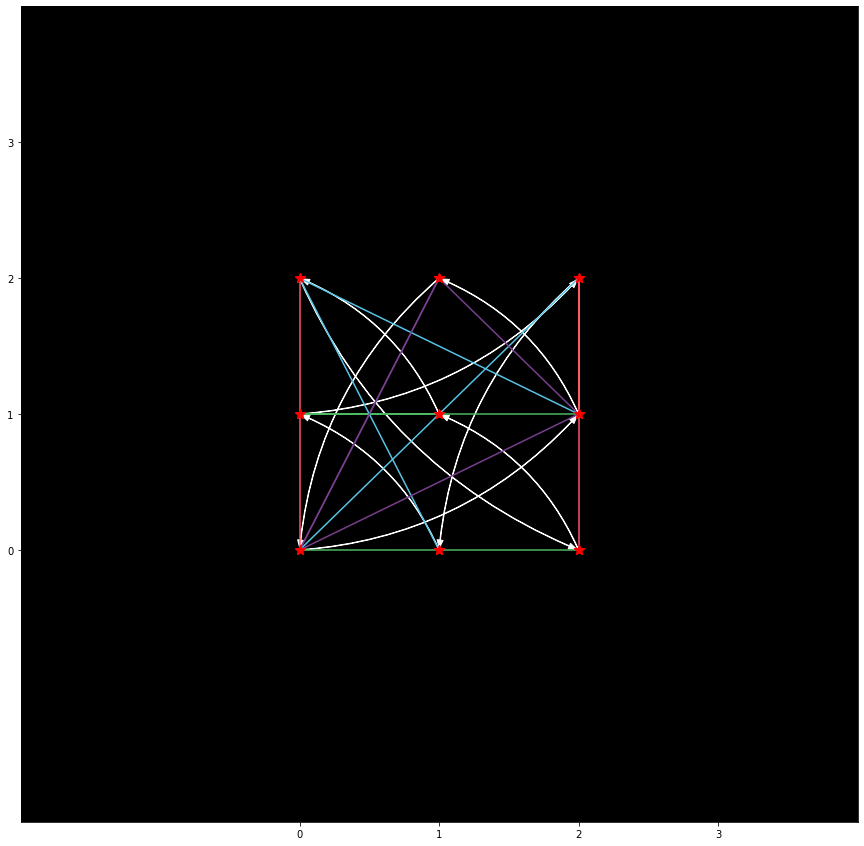

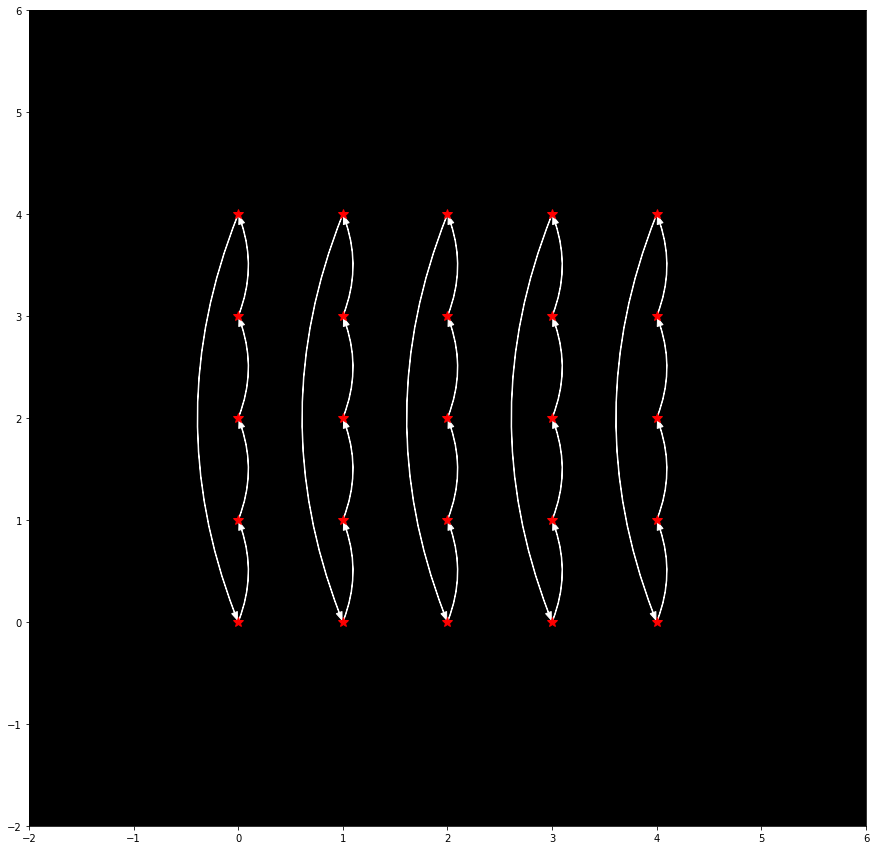

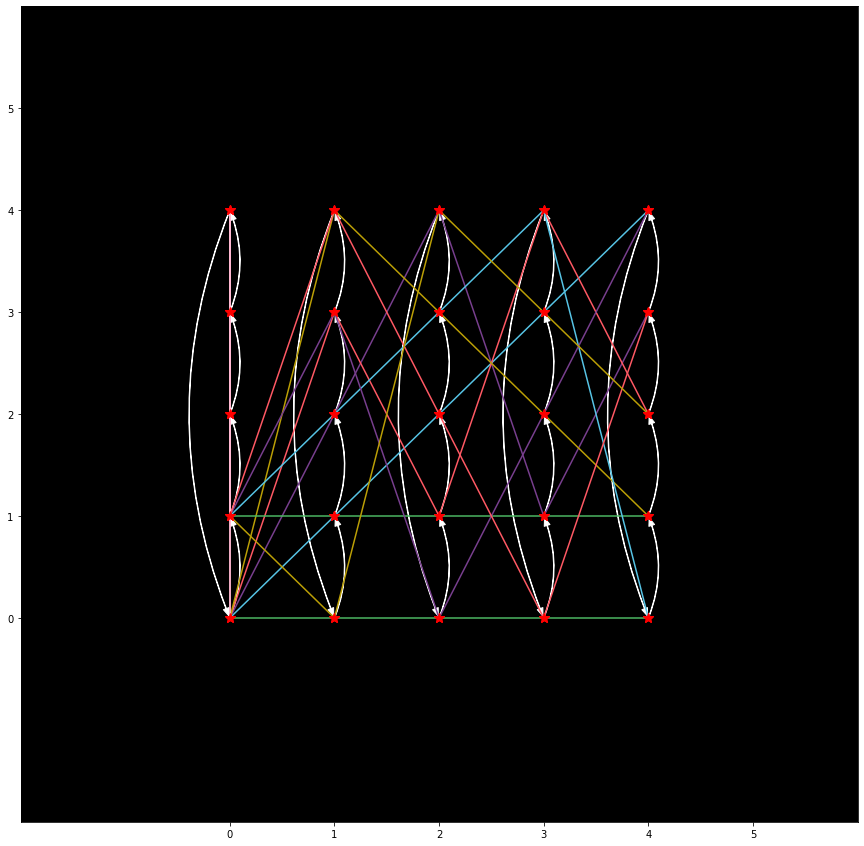

In [652]:
#Traslacion
def interactive_translation():
    order=[2,3,4,5,7,8,9,11,13,16,17]
    output = widgets.Output()

    wOrder = widgets.Dropdown(
        options = order,
        value=2,
        layout = widgets.Layout(width='150px'),
        description='orden'
    )

    x0 = widgets.BoundedIntText(
        value=0,
        description=r'\(x_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    y0 = widgets.BoundedIntText(
        value=0,
        description=r'\(y_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    xf = widgets.BoundedIntText(
        value=1,
        description=r'\(x_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    yf = widgets.BoundedIntText(
        value=9,
        description=r'\(y_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    b= widgets.Button(description='Plot') 

    def on_button_clicked(b):
        with output:
            plano = Plano(wOrder.value)
            x0.max = wOrder.value-1
            xf.max = wOrder.value-1
            y0.max = wOrder.value-1
            yf.max = wOrder.value-1
            F = plano.getSortField()
            P = Point(F[x0.value], F[y0.value], F)
            PI = Point(F[xf.value], F[yf.value], F)

            Traslacion = Translation(P, PI, plano)
            MyPlot = PlotTransformation(Traslacion, 15,colors,'dilataciones/')
            MyPlot2 = PlotTransformation(Traslacion, 15,colors,'dilataciones/')
            tMainLines = Point.vCartesian(Point,
                                          Traslacion.transformCoordinates(np.array(plano.getMainLinesList())),
                                          F)
            MyPlot.plot_dilatation()

            MyPlot2.plot_lines_set(plano.getCartesianMainLinesList())
            MyPlot2.plot_lines_set(list(tMainLines))
            MyPlot2.plot_dilatation()

    def select(b):

        plano = Plano(wOrder.value)
        x0.max = wOrder.value-1
        xf.max = wOrder.value-1
        y0.max = wOrder.value-1
        yf.max = wOrder.value-1

    b.on_click(on_button_clicked)
    wOrder.observe(select, 'value')



    #x0.observe(update_x0, names='value')
    #y0.observe(update_y0, names='value')
    #xf.observe(update_xf)
    #y0.observe(update_yf)


    H0 = widgets.HBox([x0, y0])
    Hf = widgets.HBox([xf, yf])

    Vbox = widgets.VBox([wOrder, H0, Hf,b])
    display(Vbox)

interactive_translation()

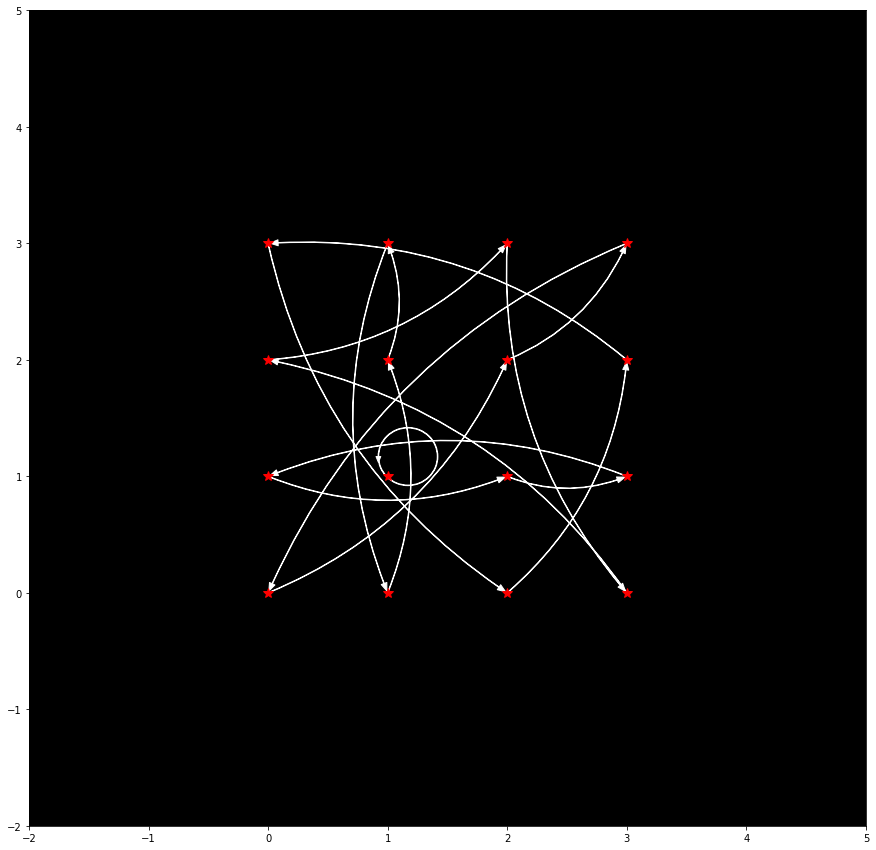

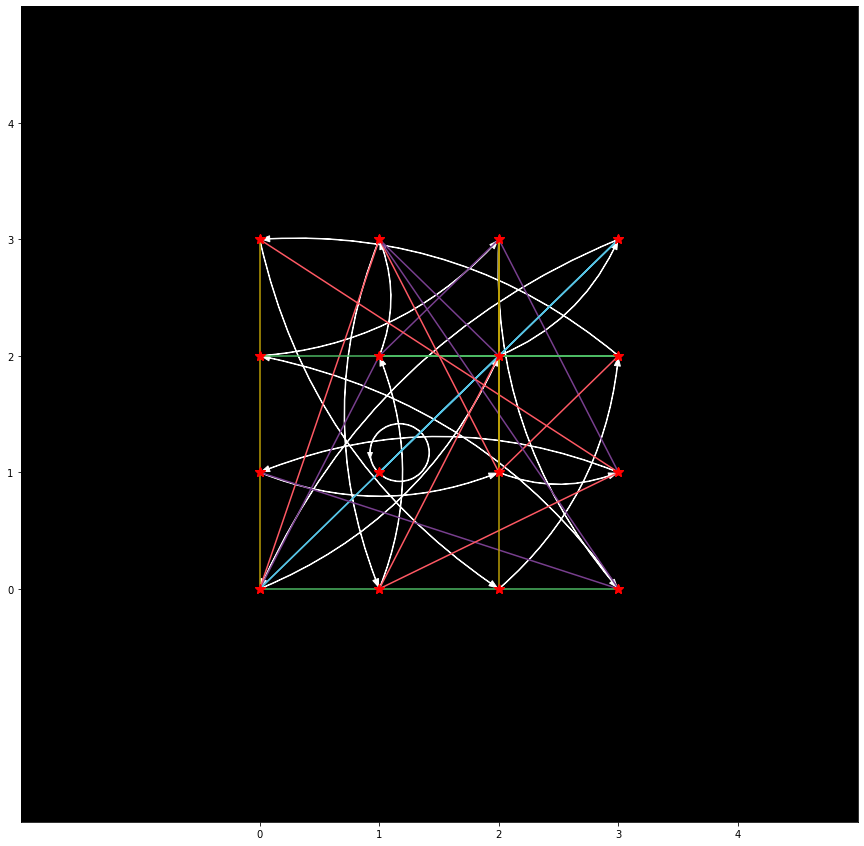

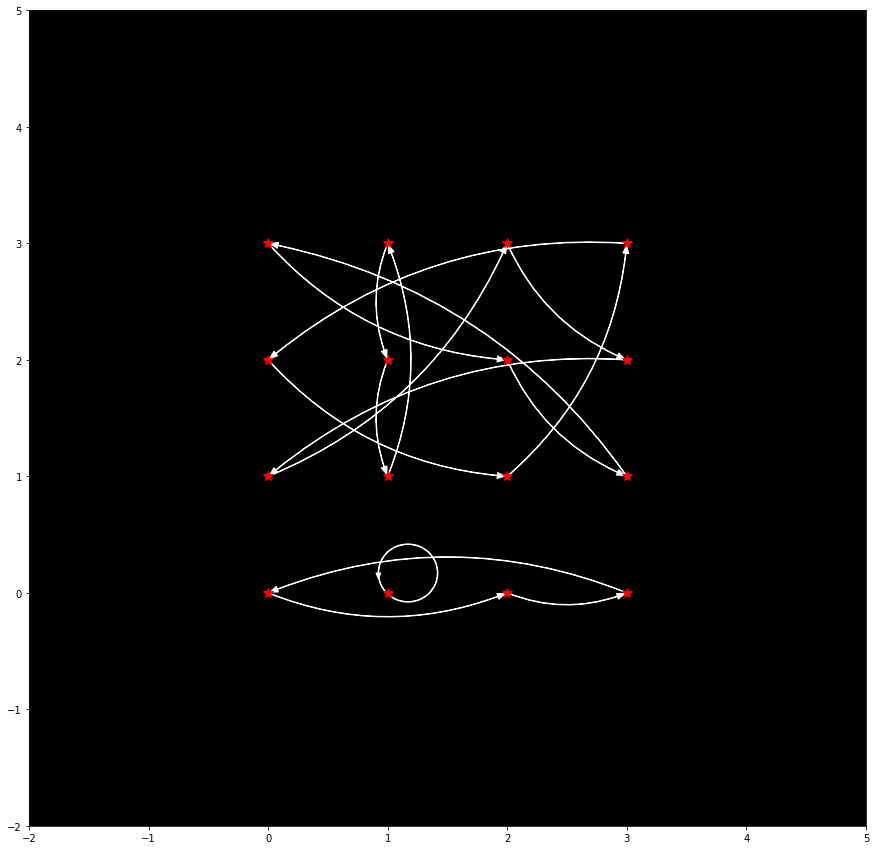

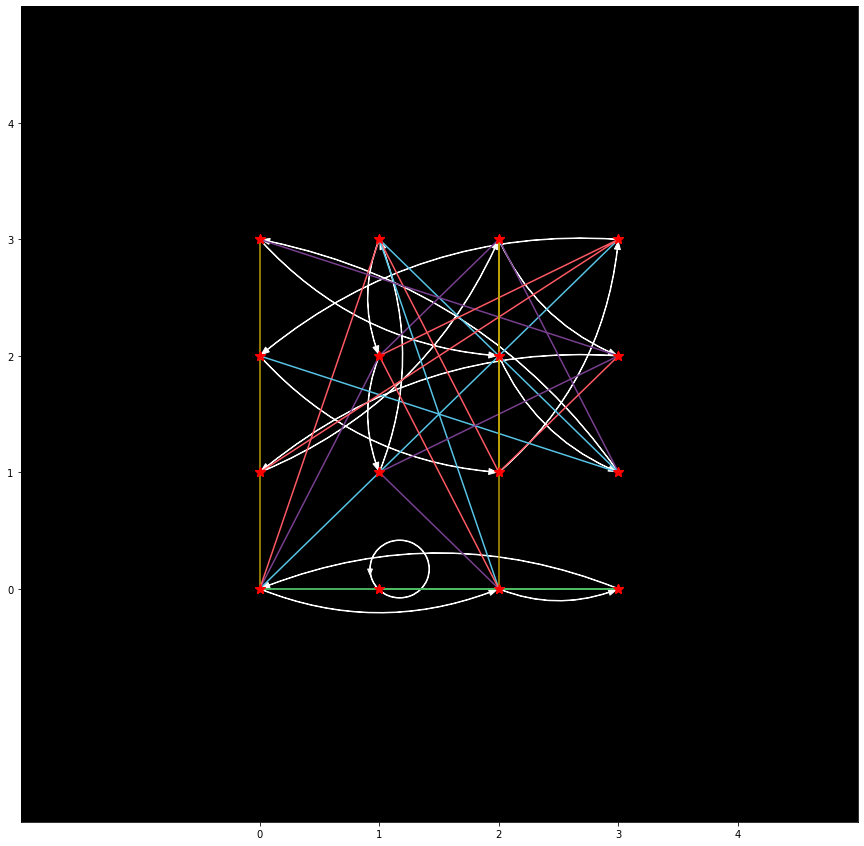

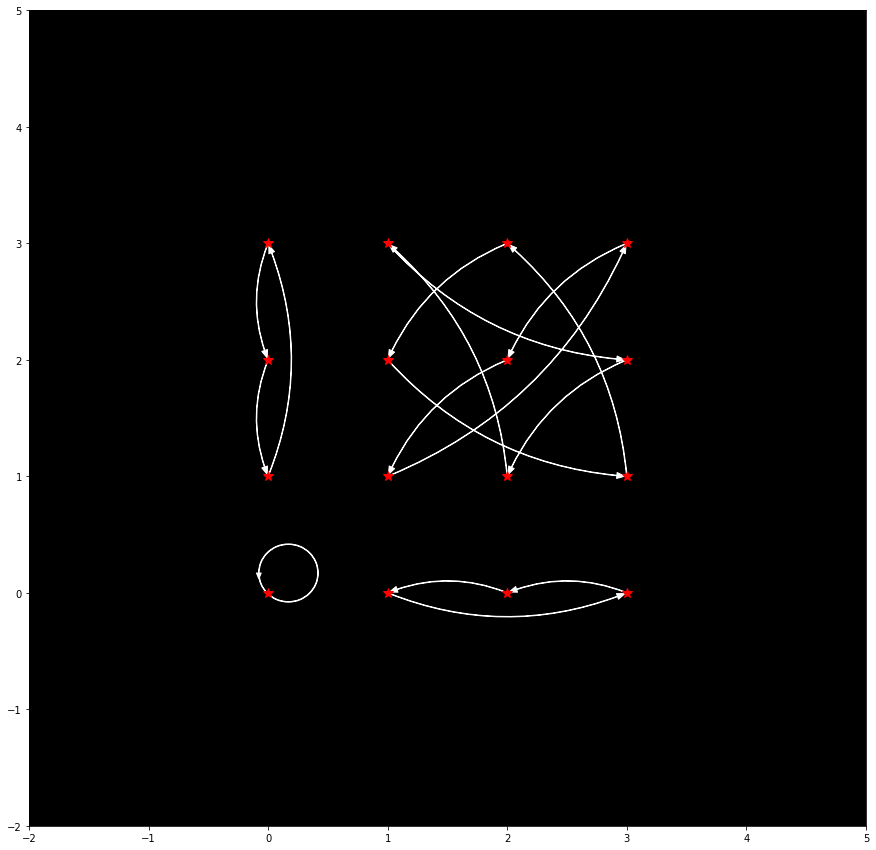

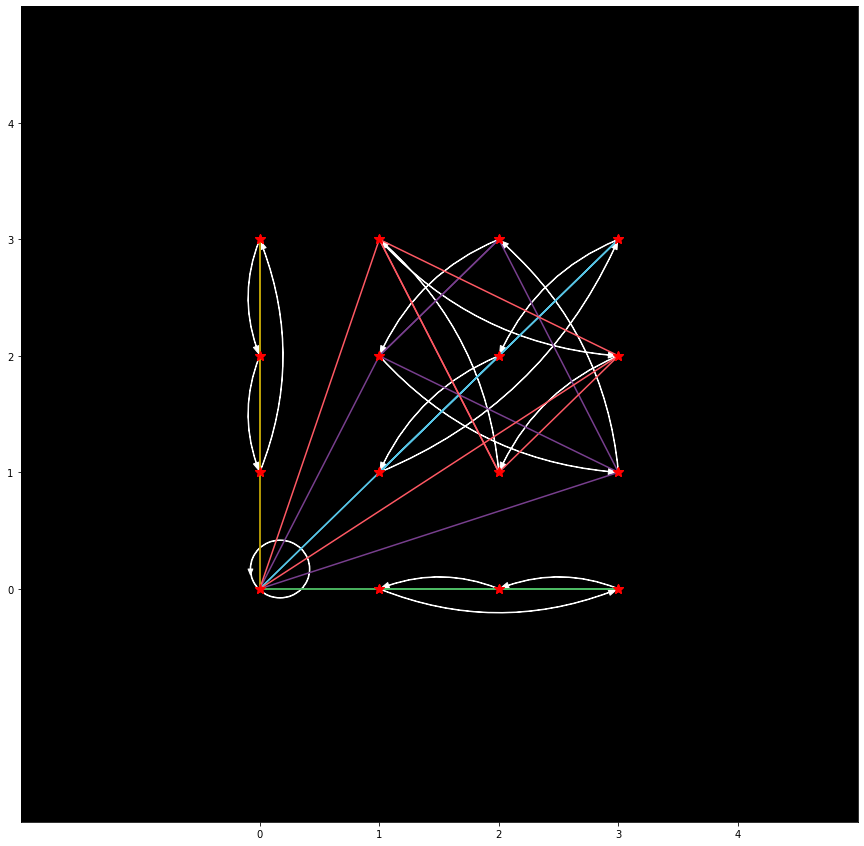

In [656]:
#homotecia
def interactive_homothety():
    output = widgets.Output()
    orderH=[2,3,4,5,7,8,9,11,13,16]
    wOrderH = widgets.Dropdown(
        value = 3,
        options = orderH,
        layout = widgets.Layout(width='150px'),
        description='orden'
    )

    x0 = widgets.BoundedIntText(
        value=0,
        description=r'\(x_0\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )
    y0 = widgets.BoundedIntText(
        value=0,
        description=r'\(y_0\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )
    xf = widgets.BoundedIntText(
        value=2,
        description=r'\(x_f\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )
    yf = widgets.BoundedIntText(
        value=2,
        description=r'\(y_f\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )

    xc = widgets.BoundedIntText(
        value=1,
        description=r'\(x_c\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )
    yc = widgets.BoundedIntText(
        value=1,
        description=r'\(y_c\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=2
    )
    b= widgets.Button(description='Plot') 

    def update_x0(change):
        print(change['new'])

    def update_y0(change):
        print(change['new'])

    def update_xf(change):
        print(change['new'])

    def update_yf(change):
        print(change['new'])


    def on_button_clicked(b):
        with output:
            plano = Plano(wOrderH.value)
            x0.max = wOrderH.value-1
            xf.max = wOrderH.value-1
            y0.max = wOrderH.value-1
            yf.max = wOrderH.value-1
            yc.max = wOrderH.value-1
            xc.max = wOrderH.value-1
            F = plano.getSortField()
            P = Point(F[x0.value], F[y0.value], F)
            PI = Point(F[xf.value], F[yf.value], F)
            C = Point(F[xc.value], F[yc.value], F)

            Homothetyc = Homothety(P, PI, C, plano)
            MyPlot = PlotTransformation(Homothetyc, 15,colors,'dilataciones/')
            MyPlot2 = PlotTransformation(Homothetyc, 15,colors,'dilataciones/')
            tMainLines = Point.vCartesian(Point,
                                          Homothetyc.transformCoordinates(np.array(plano.getMainLinesList())),
                                          F)
            MyPlot.plot_dilatation()

            MyPlot2.plot_lines_set(plano.getCartesianMainLinesList())
            MyPlot2.plot_lines_set(list(tMainLines))
            MyPlot2.plot_dilatation()

    def select(b):

        plano = Plano(wOrderH.value)
        x0.max = wOrderH.value-1
        xf.max = wOrderH.value-1
        y0.max = wOrderH.value-1
        yf.max = wOrderH.value-1
        yc.max = wOrderH.value-1
        xc.max = wOrderH.value-1

    b.on_click(on_button_clicked)
    wOrderH.observe(select, 'value')


    H0 = widgets.HBox([x0, y0])
    Hf = widgets.HBox([xf, yf])
    Hc = widgets.HBox([xc, yc])

    Vbox =widgets.VBox([wOrderH, H0, Hf,Hc,b])
    display(Vbox)
    
interactive_homothety()

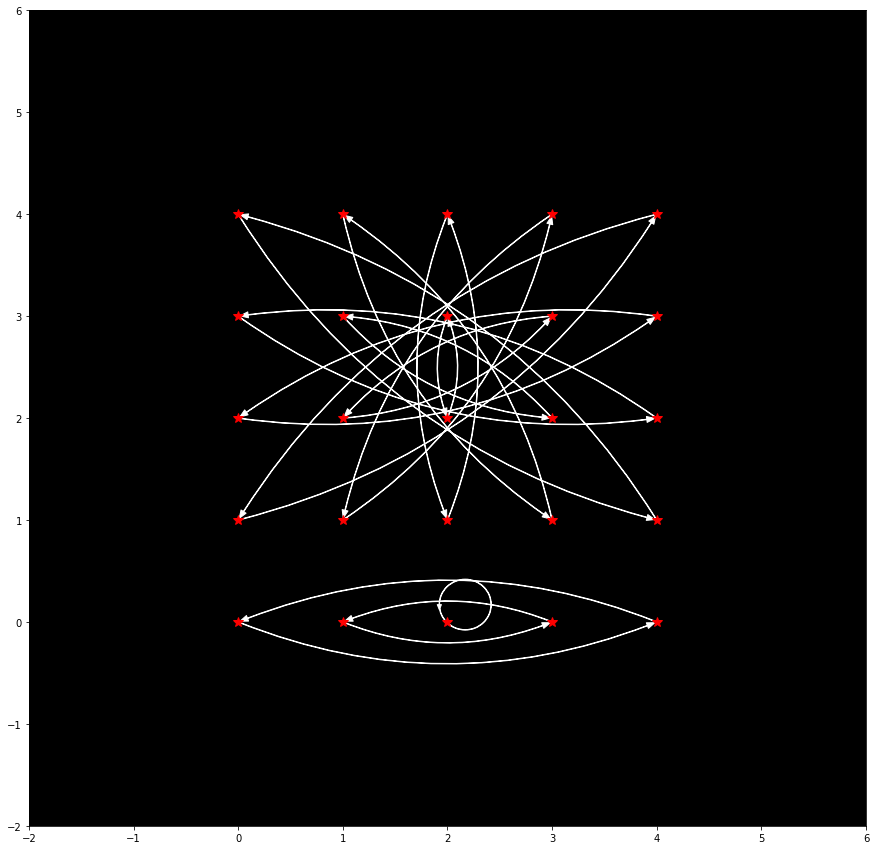

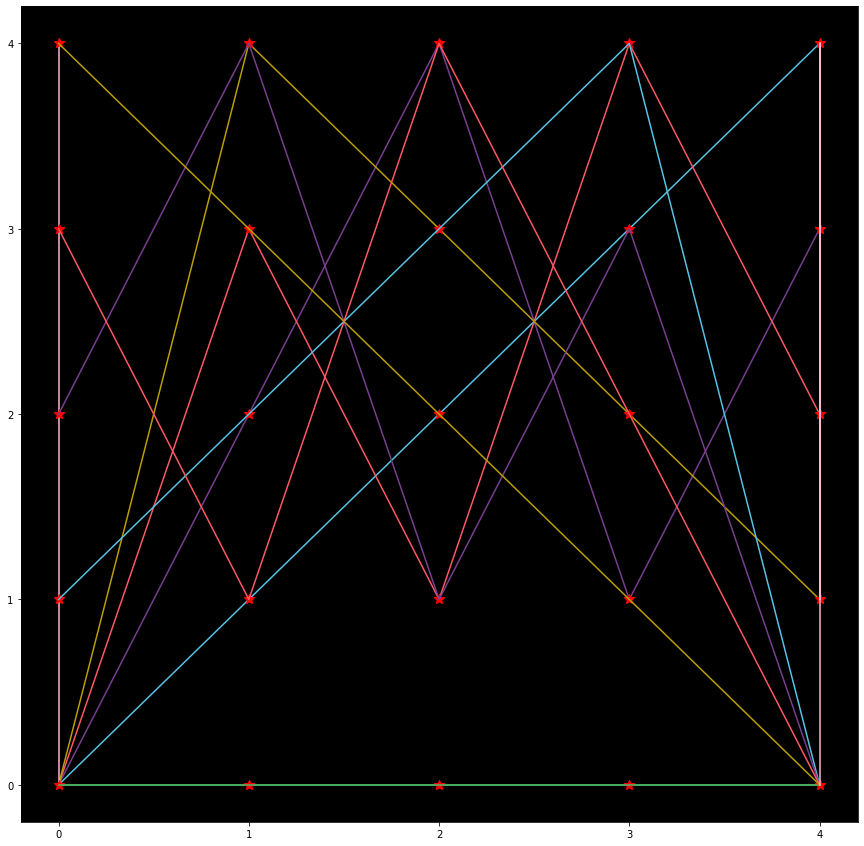

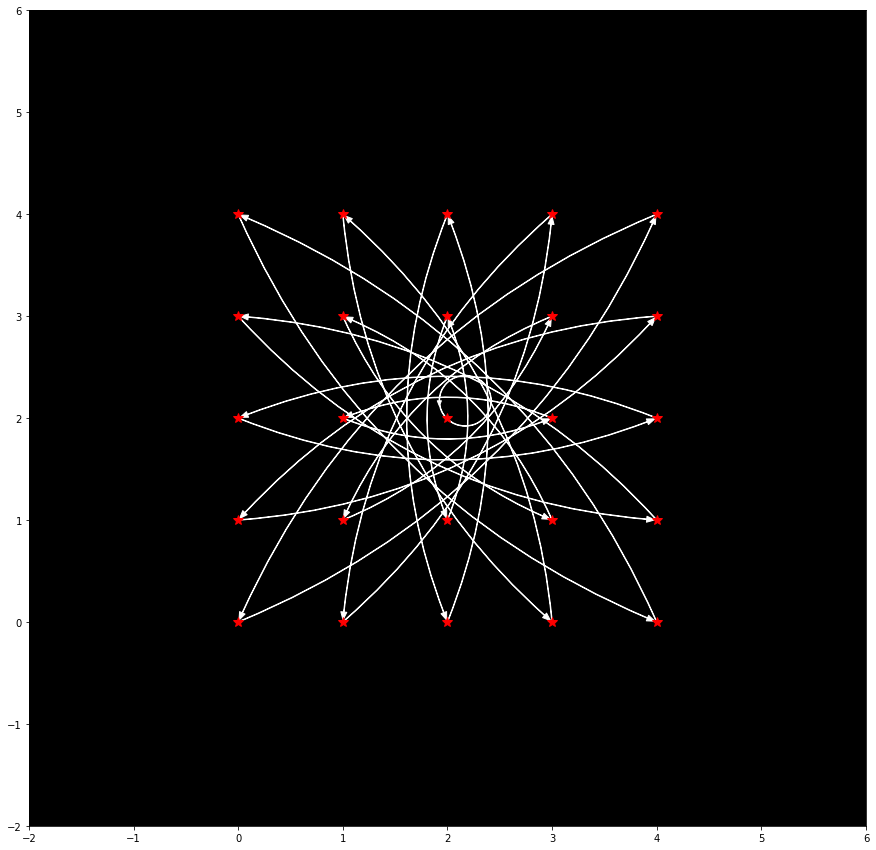

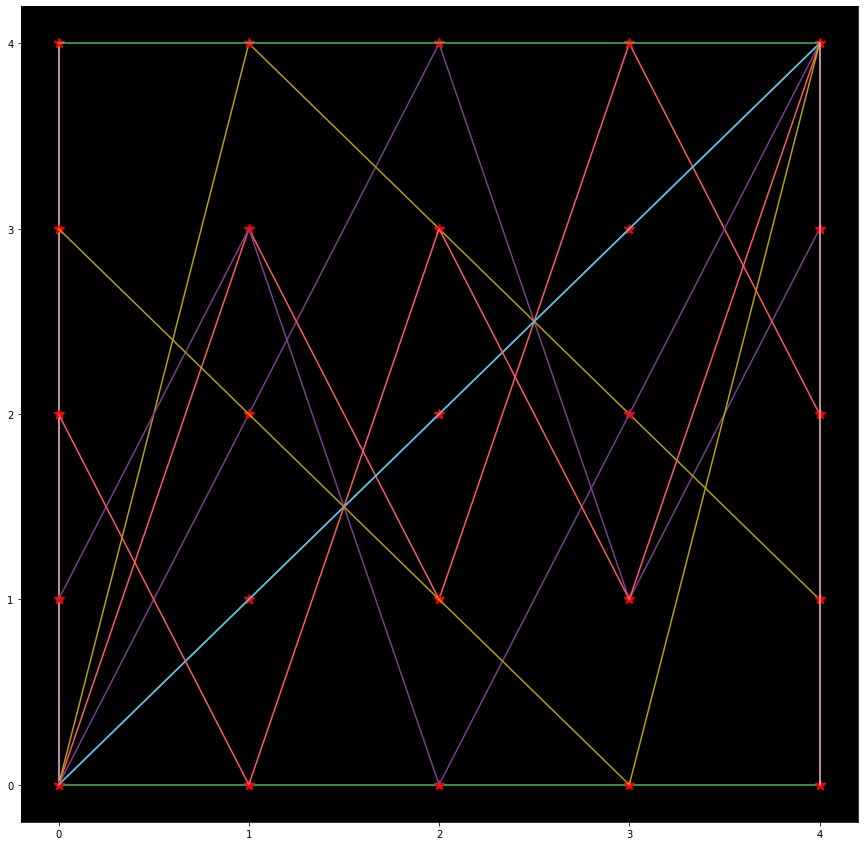

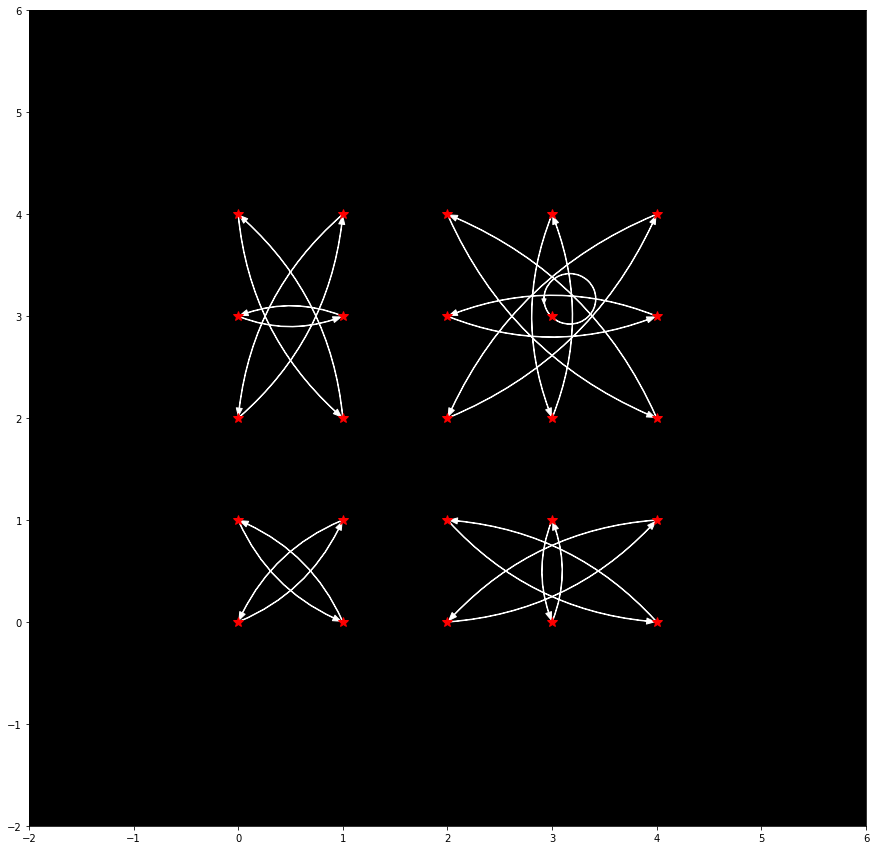

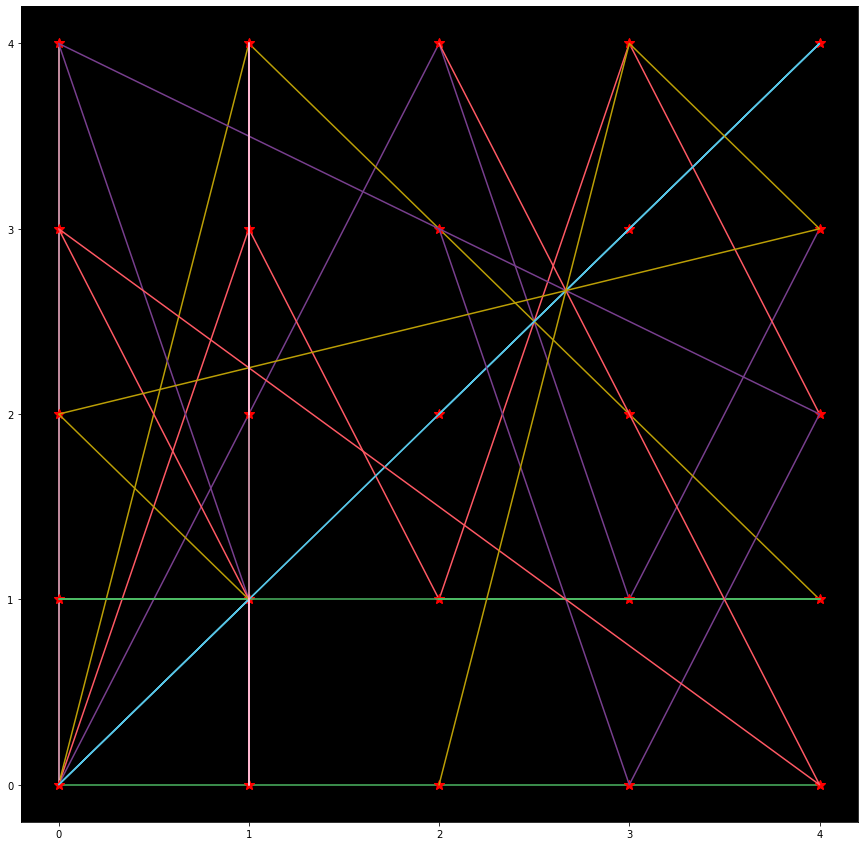

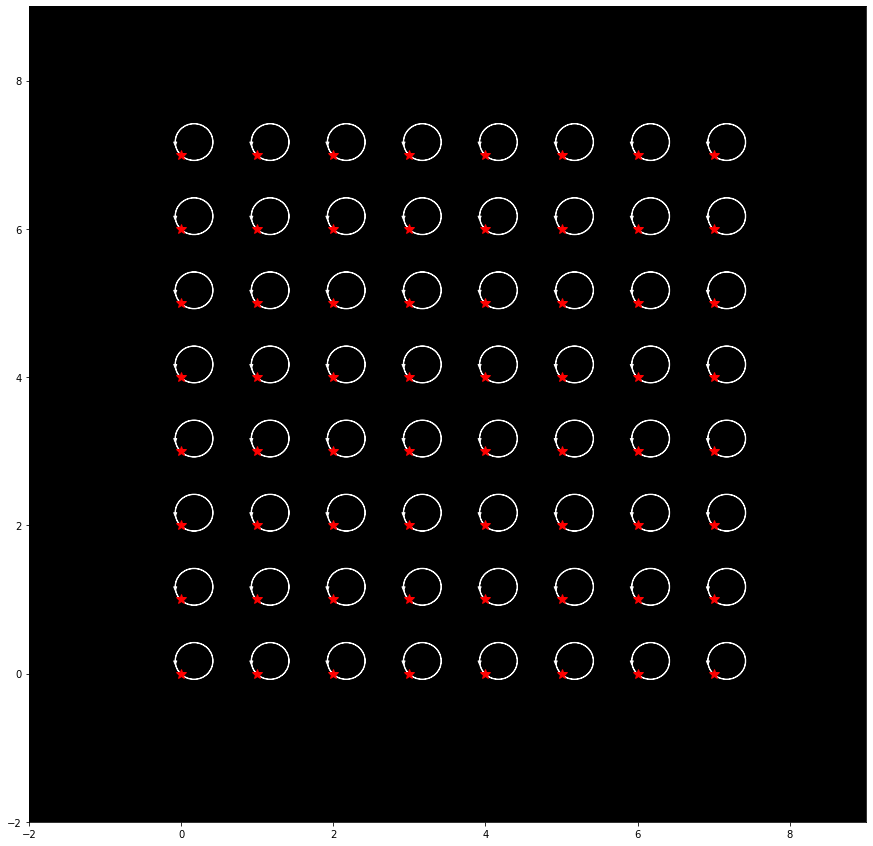

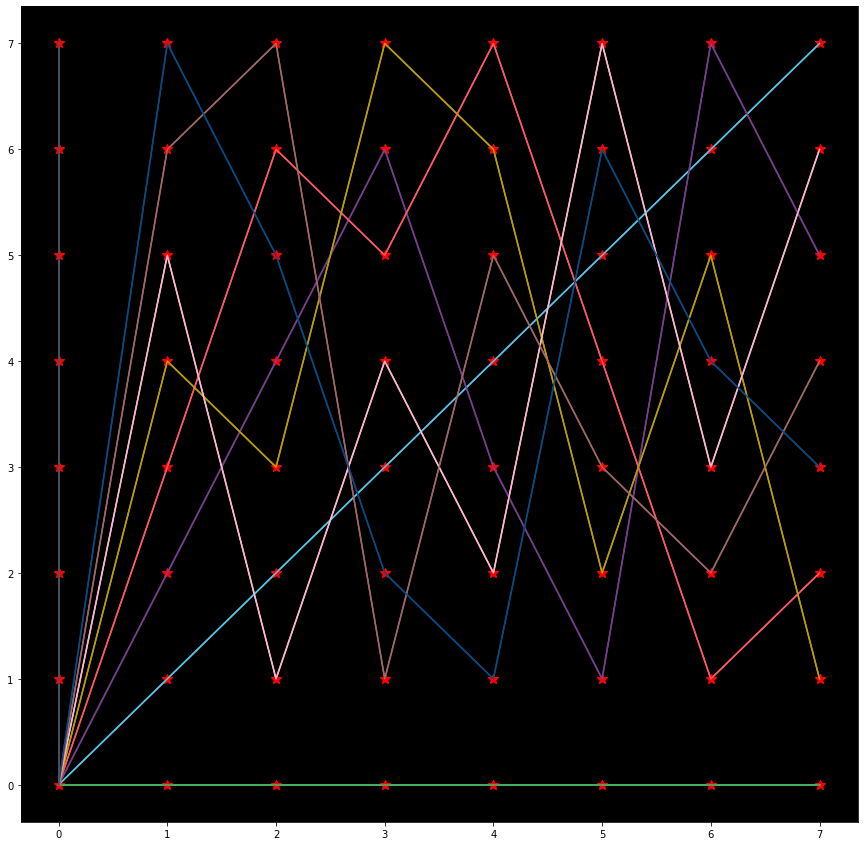

In [660]:
#Simetria central
def interactive_central_symmetry():
    output = widgets.Output()
    order=[2,3,4,5,7,8,9,11,13,16,27]
    wOrder = widgets.Dropdown(
        options = order,
        layout = widgets.Layout(width='150px'),
        description='orden'
    )

    
    
    xc = widgets.BoundedIntText(
        value=1,
        description=r'\(x_c\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=1
    )
    yc = widgets.BoundedIntText(
        value=1,
        description=r'\(y_c\)',
        disabled=False,
        layout = widgets.Layout(width='120px'),
        min=0,
        max=1
    )
    b= widgets.Button(description='Plot') 


    def on_button_clicked(b):
        with output:
            plano = Plano(wOrder.value)
            F = plano.getSortField()
            yc.max = wOrder.value-1
            xc.max = wOrder.value-1

            C = Point(F[xc.value], F[yc.value], plano.getSortField())

            Cs = CentralSymmetry( C, plano)
            MyPlot = PlotTransformation(Cs, 15,colors,'dilataciones/')
            MyPlot2 = PlotTransformation(Cs, 15,colors,'dilataciones/')
            tMainLines = Point.vCartesian(Point,
                                          Cs.transformCoordinates(np.array(plano.getMainLinesList())),
                                          F)
            MyPlot.plot_dilatation()

            MyPlot2.plot_lines_set(plano.getCartesianMainLinesList())
            MyPlot2.plot_lines_set(list(tMainLines))
            #MyPlot2.plot_dilatation()

    def select(b):

        plano = Plano(wOrder.value)
        F = plano.getSortField()
        yc.max = wOrder.value-1
        xc.max = wOrder.value-1


    b.on_click(on_button_clicked)
    wOrder.observe(select, 'value')



    #x0.observe(update_x0, names='value')
    #y0.observe(update_y0, names='value')
    #xf.observe(update_xf)
    #y0.observe(update_yf)

    Hc = widgets.HBox([xc, yc])

    Vbox = widgets.VBox([wOrder,Hc,b])
    display(Vbox)

interactive_central_symmetry()

In [661]:
class ParallelSymetryLM():
    def __init__(self,LineL,LineM, plano):
        
        self.LineL = LineL
        self.LineM = LineM
        self.plano = plano
        self.__caculateCentralSimetries()
        self.centers = list()
        
    def __caculateCentralSimetries(self):
        pathL = self.LineL.getPathLine()
        pathM = self.LineM.getPathLine()
        
        F = plano.getSortField()
        cL = self.LineL.getCartesianLine()
        

        vContain = np.vectorize(contain, excluded = ['array'])
        vContain.excluded.add(2)

        condition = False
        centers = list()

        if pathL.intersects_path(pathM):
            self.__calculateCenters()
            

        VCentralSymetry = np.vectorize(CentralSymmetry,excluded = ['plano'])
        vContain.excluded.add(VCentralSymetry)
        

        SCs = VCentralSymetry(np.array(self.centers), self.plano)
        
        self.CentralSymetries = SCs
    
    def __calculateCenters(self):
        parallelsM =  self.LineM.getCartesianParallelLines()
        
        centers = list()
        
        vContain = np.vectorize(self.LineL.containPoint)
        
        vPoint = np.vectorize(Point,excluded=['field'])
        vPoint.excluded.add(2)
        


        for lm in parallelsM:
            linePoints = vPoint((lm)[:,0],(lm)[:,1], self.LineL.getField())
            mask=vContain(linePoints)
            centers.append(lm[mask][0])
            
        
        self.centers = vPoint(np.array(centers)[:,0],np.array(centers)[:,1], self.LineL.getField())
        
    def getTransformParallelLinesM(self):
        vTransformLine = np.vectorize(self.transformLine)
        return []

    def transformLines(self):
        transforms = list()
        parallelsM = self.LineM.getParallelLines()
        for i in range(len(self.CentralSymetries)):
            transforms.append(self.CentralSymetries[i].transformCoordinates(np.array(parallelsM[i])))
        return transforms     
    
    def getLineL(self):
        return self.LineL
    
    def getLineM(self):
        return self.LineM
    
    def getPlano(self):
        return self.plano
    


    

In [663]:
#simetria paralela
def parallel_symmetry():
    order=[2,3,4,5,7,8,9,11,13,16]
    output = widgets.Output()
    wOrder = widgets.Dropdown(
        options = order,
        layout = widgets.Layout(width='150px'),
        description='orden'
    )

    xl0 = widgets.BoundedIntText(
        value=0,
        description=r'\(xl_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    yl0 = widgets.BoundedIntText(
        value=0,
        description=r'\(yl_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    xlf = widgets.BoundedIntText(
        value=1,
        description=r'\(xl_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    ylf = widgets.BoundedIntText(
        value=1,
        description=r'\(yl_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )

    xm0 = widgets.BoundedIntText(
        value=1,
        description=r'\(xm_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    ym0 = widgets.BoundedIntText(
        value=0,
        description=r'\(ym_0\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    xmf = widgets.BoundedIntText(
        value=1,
        description=r'\(xm_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    ymf = widgets.BoundedIntText(
        value=1,
        description=r'\(ym_f\)',
        disabled=False,
        layout = widgets.Layout(width='130px'),
        min=0,
        max=1
    )
    b= widgets.Button(description='Plot') 

    def update_x0(change):
        print(change['new'])

    def update_y0(change):
        print(change['new'])

    def update_xf(change):
        print(change['new'])

    def update_yf(change):
        print(change['new'])


    def on_button_clicked(b):
        with output:
            plano = Plano(wOrder.value)
            xl0.max = wOrder.value-1
            xlf.max = wOrder.value-1
            yl0.max = wOrder.value-1
            ylf.max = wOrder.value-1
            xm0.max = wOrder.value-1
            xmf.max = wOrder.value-1
            ym0.max = wOrder.value-1
            ymf.max = wOrder.value-1

            F = plano.getSortField()

            P1L = Point(F[xl0.value], F[yl0.value], F)
            P2L = Point(F[xlf.value], F[ylf.value], F)

            P1M = Point(F[xm0.value], F[ym0.value], F)
            P2M = Point(F[xmf.value], F[ymf.value], F)

            LineL = Line(P2L.getXY() - P1L.getXY(), F, P1L.getXY())
            LineM = Line(P2M.getXY() - P1M.getXY(), F, P1M.getXY())

            PSLM = ParallelSymetryLM(LineL, LineM, plano)
            MyPlot = PlotTrasformation(PSLM, 10,colors,'dilataciones/')
            MyPlot.plot_parallel_simetryLM()

            #plot_parallel_simetryLM(plano, PSLM.transformLines(), LineM.getParallelLines(),10,'simetrias_paralelas/')


    def select(b):

        plano = Plano(wOrder.value)
        xl0.max = wOrder.value-1
        xlf.max = wOrder.value-1
        yl0.max = wOrder.value-1
        ylf.max = wOrder.value-1
        xm0.max = wOrder.value-1
        xmf.max = wOrder.value-1
        ym0.max = wOrder.value-1
        ymf.max = wOrder.value-1


    b.on_click(on_button_clicked)
    wOrder.observe(select, 'value')



    #x0.observe(update_x0, names='value')
    #y0.observe(update_y0, names='value')
    #xf.observe(update_xf)
    #y0.observe(update_yf)


    Hl0 = widgets.HBox([xl0, yl0])
    Hlf = widgets.HBox([xlf, ylf])
    Hm0 = widgets.HBox([xm0, ym0])
    Hmf = widgets.HBox([xmf, ymf])

    Vbox = widgets.VBox([wOrder, Hl0, Hlf,Hm0,Hmf,b])
    display(Vbox)

parallel_symmetry()

Output()